# <center> Ketertarikan Mahasiswa/i Universitas XXX dalam Berolahraga
    
* Ilham Ramadhan Nur Ahmad

# ``About Dataset``

Dataset ini dibagi menjadi variabel dependen dan independen:

Variabel dependen ($y$) merupakan indikator apakah seorang aktif berolahraga atau tidak.

Variable independen terdiri dari 11 kolom yaitu:

$x_1$ = Apakah Anda mengikuti kegiatan SAC Sport saat ini?

$x_2$ = Apakah Anda perokok?

$x_3$ = Berapa tinggi badan Anda dalam cm?

$x_4$ = Berapa berat badan Anda dalam kg

$x_5$ = Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?

$x_6$ = Berapa lama waktu tidur Anda?

$x_7$ = Berapa kali dalam seminggu Anda berolahraga?

$x_8$ = Seberapa peduli Anda terhadap asupan makanan yang dikonsumsi?

$x_9$ = Seberapa peduli Anda terhadap kesehatan Anda secara keseluruhan?

$x_{10}$ = Seberapa peduli Anda terhadap penampilan tubuh Anda?

$x_{11}$ = Berapa banyak waktu kosong dalam sehari yang biasanya Anda miliki?

Agar lebih terorganisir, kami akan menghapus data yang tidak sesuai dengan kebutuhan analisis.

##  <font color=blue> Step 1 : Import Package and Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('Dataset Survey.csv')
df

,Timestamp,Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?,Jurusan,Angkatan,Domisili,Jenis Kelamin,Usia,Apakah Anda aktif dalam berolahraga?,Apakah Anda mengikuti kegiatan SAC Sport saat ini?,Apakah Anda perokok?,Berapa tinggi badan Anda dalam cm?,Berapa berat badan Anda dalam kg?,Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?,Berapa lama waktu tidur Anda?,Berapa kali dalam seminggu Anda berolahraga?,Seberapa peduli Anda terhadap asupan makanan yang dikonsumsi?,Seberapa peduli Anda terhadap kesehatan Anda secara keseluruhan?,Seberapa peduli Anda terhadap penampilan tubuh Anda?,Berapa banyak waktu kosong dalam sehari yang biasanya Anda miliki?
0,26-05-23 17:46,Iya,Software Engineering,2019.0,Tangerang,Pria,22.0,Iya,Tidak,Tidak,165.0,96.0,1.00,6.0,2.0,75.0,80.0,70.0,2.0
1,26-05-23 18:33,Iya,Accounting,2021.0,Tangerang,Wanita,19.0,Tidak,Tidak,Tidak,158.0,50.0,1.00,6.0,1.0,75.0,99.0,100.0,5.0
2,26-05-23 23:41,Iya,Business Mathematics,2020.0,Tangerang,Wanita,21.0,Tidak,Tidak,Tidak,168.0,48.0,0.25,8.0,5.0,85.0,85.0,90.0,3.0
3,27-05-23 10:28,Iya,Business Management,2019.0,Tangerang,Wanita,21.0,Tidak,Tidak,Tidak,153.0,42.0,1.00,7.0,2.0,75.0,75.0,70.0,6.0
4,27-05-23 10:30,Iya,Business Mathematics,2020.0,Tangerang,Wanita,20.0,Tidak,Tidak,Tidak,163.0,58.0,0.00,7.0,0.0,80.0,80.0,90.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,11-06-23 12:51,Iya,Hospitality Business,2020.0,Tangerang,Wanita,20.0,Tidak,Tidak,Tidak,159.0,50.0,2.00,7.0,1.0,75.0,75.0,75.0,3.0
306,11-06-23 13:04,Iya,Event,2020.0,Jakarta,Wanita,20.0,Iya,Tidak,Tidak,166.0,52.0,2.00,6.0,3.0,65.0,75.0,80.0,4.0
307,11-06-23 13:07,Iya,International Business Law,2019.0,Tangerang,Pria,22.0,Tidak,Tidak,Iya,175.0,75.0,1.00,5.0,1.0,50.0,75.0,50.0,5.0
308,11-06-23 14:59,Iya,Business Management,2019.0,Tangerang,Pria,22.0,Tidak,Tidak,Iya,172.0,60.0,0.00,6.0,0.0,84.0,85.0,86.0,2.0


## <font color=blue> Step 2 : Data Preparation and Cleaning

In [3]:
df = df.drop('Timestamp', axis=1)
df

,Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?,Jurusan,Angkatan,Domisili,Jenis Kelamin,Usia,Apakah Anda aktif dalam berolahraga?,Apakah Anda mengikuti kegiatan SAC Sport saat ini?,Apakah Anda perokok?,Berapa tinggi badan Anda dalam cm?,Berapa berat badan Anda dalam kg?,Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?,Berapa lama waktu tidur Anda?,Berapa kali dalam seminggu Anda berolahraga?,Seberapa peduli Anda terhadap asupan makanan yang dikonsumsi?,Seberapa peduli Anda terhadap kesehatan Anda secara keseluruhan?,Seberapa peduli Anda terhadap penampilan tubuh Anda?,Berapa banyak waktu kosong dalam sehari yang biasanya Anda miliki?
0,Iya,Software Engineering,2019.0,Tangerang,Pria,22.0,Iya,Tidak,Tidak,165.0,96.0,1.00,6.0,2.0,75.0,80.0,70.0,2.0
1,Iya,Accounting,2021.0,Tangerang,Wanita,19.0,Tidak,Tidak,Tidak,158.0,50.0,1.00,6.0,1.0,75.0,99.0,100.0,5.0
2,Iya,Business Mathematics,2020.0,Tangerang,Wanita,21.0,Tidak,Tidak,Tidak,168.0,48.0,0.25,8.0,5.0,85.0,85.0,90.0,3.0
3,Iya,Business Management,2019.0,Tangerang,Wanita,21.0,Tidak,Tidak,Tidak,153.0,42.0,1.00,7.0,2.0,75.0,75.0,70.0,6.0
4,Iya,Business Mathematics,2020.0,Tangerang,Wanita,20.0,Tidak,Tidak,Tidak,163.0,58.0,0.00,7.0,0.0,80.0,80.0,90.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Iya,Hospitality Business,2020.0,Tangerang,Wanita,20.0,Tidak,Tidak,Tidak,159.0,50.0,2.00,7.0,1.0,75.0,75.0,75.0,3.0
306,Iya,Event,2020.0,Jakarta,Wanita,20.0,Iya,Tidak,Tidak,166.0,52.0,2.00,6.0,3.0,65.0,75.0,80.0,4.0
307,Iya,International Business Law,2019.0,Tangerang,Pria,22.0,Tidak,Tidak,Iya,175.0,75.0,1.00,5.0,1.0,50.0,75.0,50.0,5.0
308,Iya,Business Management,2019.0,Tangerang,Pria,22.0,Tidak,Tidak,Iya,172.0,60.0,0.00,6.0,0.0,84.0,85.0,86.0,2.0


In [4]:
df.describe()

,Angkatan,Usia,Berapa tinggi badan Anda dalam cm?,Berapa berat badan Anda dalam kg?,Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?,Berapa lama waktu tidur Anda?,Berapa kali dalam seminggu Anda berolahraga?,Seberapa peduli Anda terhadap asupan makanan yang dikonsumsi?,Seberapa peduli Anda terhadap kesehatan Anda secara keseluruhan?,Seberapa peduli Anda terhadap penampilan tubuh Anda?,Berapa banyak waktu kosong dalam sehari yang biasanya Anda miliki?
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,2020.059603,20.718543,167.562583,60.574503,1.188245,6.678808,1.927152,80.721854,85.705298,84.569536,4.073179
std,0.457231,0.792565,7.308969,12.634075,0.879143,1.075774,1.688733,15.261468,12.846496,14.243964,2.110040
min,2019.000000,19.000000,146.000000,35.000000,0.000000,4.000000,0.000000,45.000000,40.000000,40.000000,0.000000
25%,2020.000000,20.000000,163.000000,51.000000,0.500000,6.000000,0.000000,70.000000,80.000000,77.250000,2.000000
50%,2020.000000,21.000000,167.000000,60.000000,1.000000,6.500000,2.000000,80.000000,87.500000,90.000000,4.000000
75%,2020.000000,21.000000,173.375000,66.000000,2.000000,8.000000,3.000000,90.000000,98.000000,95.750000,5.000000
max,2022.000000,27.000000,185.000000,108.000000,4.000000,10.000000,7.000000,100.000000,100.000000,100.000000,12.000000


**`Penjelasan:`**

* Berdasarkan data yang sudah kita kumpulkan, rata-rata dari angkatan dari para responden adalah angkatan 2020, dengan angkatan tertua adalah angkatan 2019 dan angkatan termuda adalah 2022. 

* Rata-rata usia para responden adalah 21 tahun dengan, responden termuda adalah 19 tahun dan respondent tertua 27 tahun. 

* Rata-rata tinggi badan responden adalah 168 cm, dengan yang terpendek adalah 146 cm dan yang tertinggi adalah 185 cm. 

* Rata-rata berat badan responden adalah 61 kg, dengan yang teringan adalah 35 kg dan terberat adalah 108 kg. 

* Rata-rata lama sesi olahraga responden adalah 1 jam dengan yang tercepat adalah 0 jam (tidak berolahraga) dan terlama adalah 4 jam. 

* Rata-rata lama waktu tidur responden adalah 7 jam, dengan yang tercepat adalah 4 jam dan yang terlama adalah 10 jam. 

* Rata-rata jumlah sesi olahraga yang dilakukan responden adalah 2 kali, dengan yang tersedikit adalah 0 kali dan terbanyak adalah 7 kali (setiap hari). 

* Rata-rata tingkat kepedulian responden terhadap makanan yang dikonsumsi adalah 81, dengan yang terendah adalah 45, dan tertinggi adalah 100. 

* Rata-rata tingkat kepedulian responden terhadap kesehatan mereka adalah 86, dengan yang terendah adalah 40, dan tertinggi adalah 100. 

* Rata-rata tingkat kepedulian responden terhadap penampilan mereka adalah 85, dengan yang terendah adalah 40, dan tertinggi adalah 100. 

* Rata-rata waktu kosong responden adalah 4 jam, dengan yang terendah adalah 0 jam, dan yang tertinggi adalah 12 jam.


In [5]:
df.isnull().sum()

Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?                     0
Jurusan                                                                8
Angkatan                                                               8
Domisili                                                               8
Jenis Kelamin                                                          8
Usia                                                                   8
Apakah Anda aktif dalam berolahraga?                                   8
Apakah Anda mengikuti kegiatan SAC Sport saat ini?                     8
Apakah Anda perokok?                                                   8
Berapa tinggi badan Anda dalam cm?                                     8
Berapa berat badan Anda dalam kg?                                      8
Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?    8
Berapa lama waktu tidur Anda?                                          8
Berapa kali dalam seminggu Anda berolahraga?       

In [6]:
df[['Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?']].value_counts()

Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?
Iya                                                   302
Tidak                                                   8
dtype: int64

In [7]:
df1 = df.drop(df[df['Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?'] == 'Tidak'].index)

In [8]:
df1.isnull().sum()

Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?                     0
Jurusan                                                                0
Angkatan                                                               0
Domisili                                                               0
Jenis Kelamin                                                          0
Usia                                                                   0
Apakah Anda aktif dalam berolahraga?                                   0
Apakah Anda mengikuti kegiatan SAC Sport saat ini?                     0
Apakah Anda perokok?                                                   0
Berapa tinggi badan Anda dalam cm?                                     0
Berapa berat badan Anda dalam kg?                                      0
Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?    0
Berapa lama waktu tidur Anda?                                          0
Berapa kali dalam seminggu Anda berolahraga?       

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 309
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?                   302 non-null    object 
 1   Jurusan                                                              302 non-null    object 
 2   Angkatan                                                             302 non-null    float64
 3   Domisili                                                             302 non-null    object 
 4   Jenis Kelamin                                                        302 non-null    object 
 5   Usia                                                                 302 non-null    float64
 6   Apakah Anda aktif dalam berolahraga?                                 302 non-null    object 
 7   Apakah A

In [10]:
print('Number of rows:',df1.shape[0])
print('Number of columns:',df1.shape[1])

Number of rows: 302
Number of columns: 18


In [11]:
kolom_lama = [
    'Apakah Anda mengikuti kegiatan SAC Sport saat ini?',
    'Apakah Anda perokok?',
    'Berapa tinggi badan Anda dalam cm?',
    'Berapa berat badan Anda dalam kg?',
    'Berapa lama setiap sesi olahraga yang Anda lakukan dalam satu hari?',
    'Berapa lama waktu tidur Anda?',
    'Berapa kali dalam seminggu Anda berolahraga?',
    'Seberapa peduli Anda terhadap asupan makanan yang dikonsumsi?',
    'Seberapa peduli Anda terhadap kesehatan Anda secara keseluruhan?',
    'Seberapa peduli Anda terhadap penampilan tubuh Anda?',
    'Berapa banyak waktu kosong dalam sehari yang biasanya Anda miliki?'
]

kolom_baru = {kolom: f'X{i+1}' for i, kolom in enumerate(kolom_lama)}

df1 = df1.rename(columns=kolom_baru)
df1

,Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?,Jurusan,Angkatan,Domisili,Jenis Kelamin,Usia,Apakah Anda aktif dalam berolahraga?,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,Iya,Software Engineering,2019.0,Tangerang,Pria,22.0,Iya,Tidak,Tidak,165.0,96.0,1.00,6.0,2.0,75.0,80.0,70.0,2.0
1,Iya,Accounting,2021.0,Tangerang,Wanita,19.0,Tidak,Tidak,Tidak,158.0,50.0,1.00,6.0,1.0,75.0,99.0,100.0,5.0
2,Iya,Business Mathematics,2020.0,Tangerang,Wanita,21.0,Tidak,Tidak,Tidak,168.0,48.0,0.25,8.0,5.0,85.0,85.0,90.0,3.0
3,Iya,Business Management,2019.0,Tangerang,Wanita,21.0,Tidak,Tidak,Tidak,153.0,42.0,1.00,7.0,2.0,75.0,75.0,70.0,6.0
4,Iya,Business Mathematics,2020.0,Tangerang,Wanita,20.0,Tidak,Tidak,Tidak,163.0,58.0,0.00,7.0,0.0,80.0,80.0,90.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Iya,Hospitality Business,2020.0,Tangerang,Wanita,20.0,Tidak,Tidak,Tidak,159.0,50.0,2.00,7.0,1.0,75.0,75.0,75.0,3.0
306,Iya,Event,2020.0,Jakarta,Wanita,20.0,Iya,Tidak,Tidak,166.0,52.0,2.00,6.0,3.0,65.0,75.0,80.0,4.0
307,Iya,International Business Law,2019.0,Tangerang,Pria,22.0,Tidak,Tidak,Iya,175.0,75.0,1.00,5.0,1.0,50.0,75.0,50.0,5.0
308,Iya,Business Management,2019.0,Tangerang,Pria,22.0,Tidak,Tidak,Iya,172.0,60.0,0.00,6.0,0.0,84.0,85.0,86.0,2.0


## <font color=blue> Step 3 : EDA

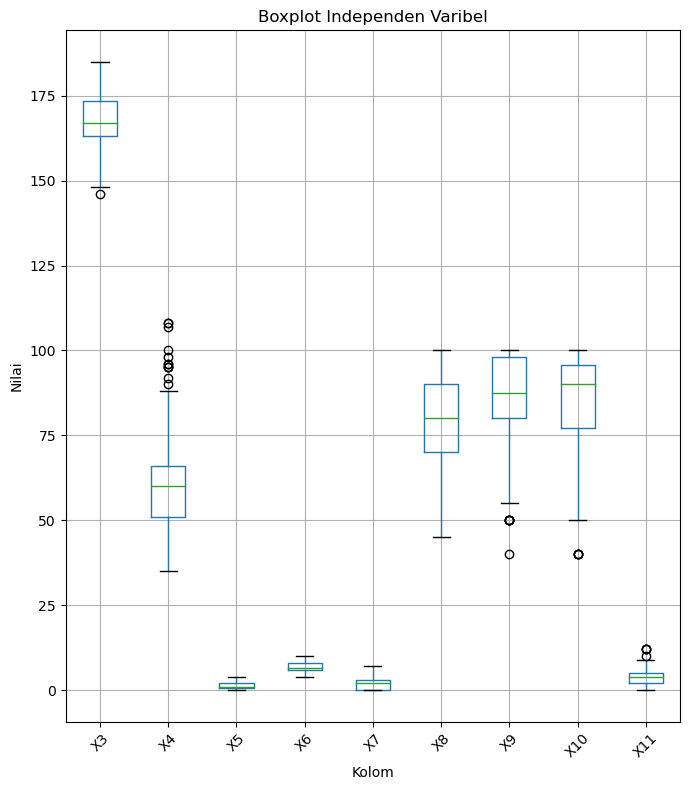

In [12]:
kolom_outlier = ['X3', 'X4', 'X5', 'X6','X7', 'X8', 'X9', 'X10', 'X11']
plt.figure(figsize=(7, 8))
df1[kolom_outlier].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot Independen Varibel')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.tight_layout()
plt.show()

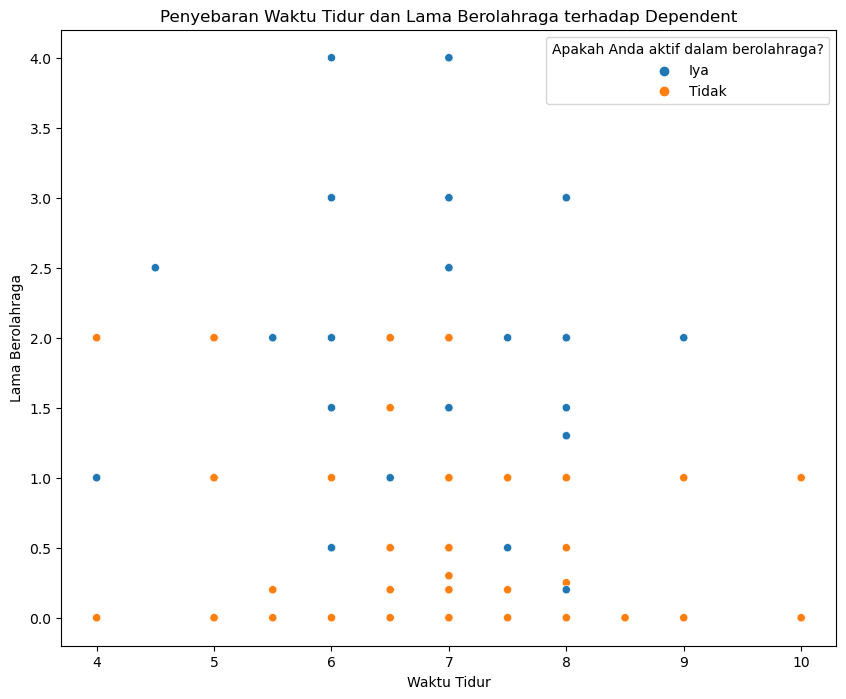

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df1, x='X6', y='X5', hue='Apakah Anda aktif dalam berolahraga?', ax=ax)
plt.title("Penyebaran Waktu Tidur dan Lama Berolahraga terhadap Dependent")
plt.xlabel('Waktu Tidur')
plt.ylabel('Lama Berolahraga')
plt.show()

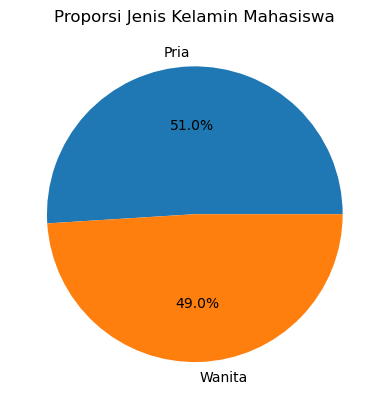

In [14]:
jenkel_count = df1['Jenis Kelamin'].value_counts()
jenkel_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporsi Jenis Kelamin Mahasiswa')
plt.ylabel('')
plt.show()

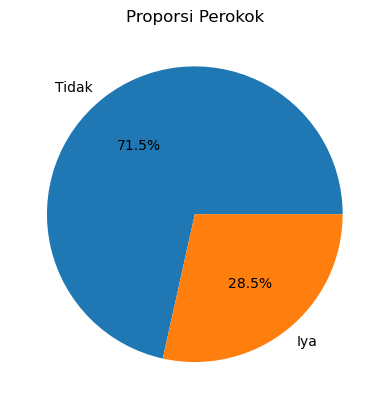

In [15]:
smoke = df1['X2'].value_counts()
smoke.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporsi Perokok')
plt.ylabel('')
plt.show()

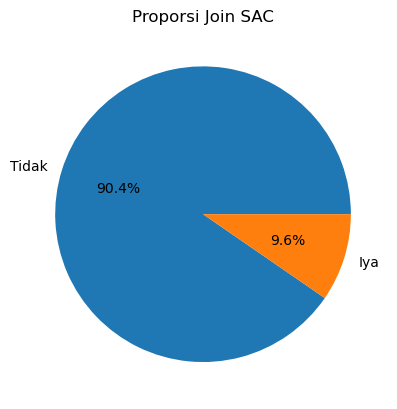

In [16]:
sac = df1['X1'].value_counts()
sac.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporsi Join SAC')
plt.ylabel('')
plt.show()

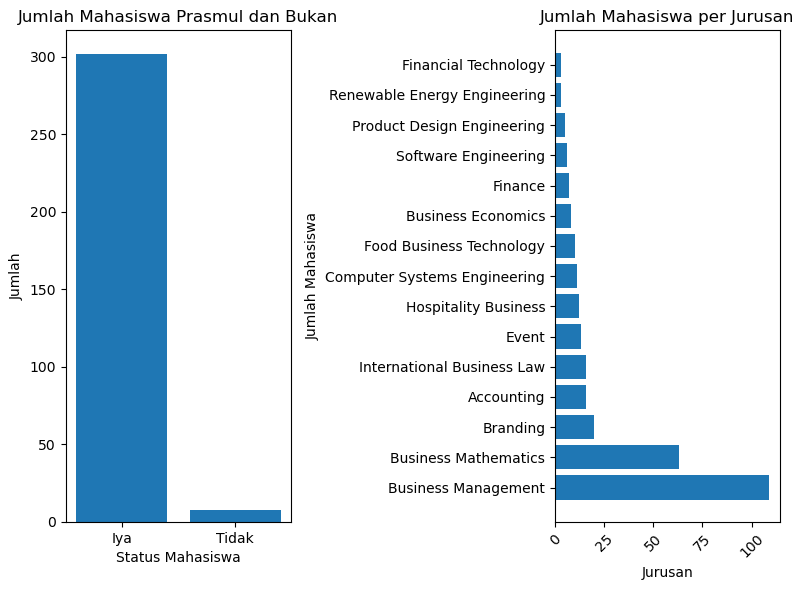

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

mahasiswa_count = df['Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?'].value_counts()
axes[0].bar(mahasiswa_count.index, mahasiswa_count.values)
axes[0].set_title('Jumlah Mahasiswa Prasmul dan Bukan')
axes[0].set_xlabel('Status Mahasiswa')
axes[0].set_ylabel('Jumlah')


jurusan_count = df['Jurusan'].value_counts()
axes[1].barh(jurusan_count.index, jurusan_count.values)
axes[1].set_title('Jumlah Mahasiswa per Jurusan')
axes[1].set_xlabel('Jurusan')
axes[1].set_ylabel('Jumlah Mahasiswa')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

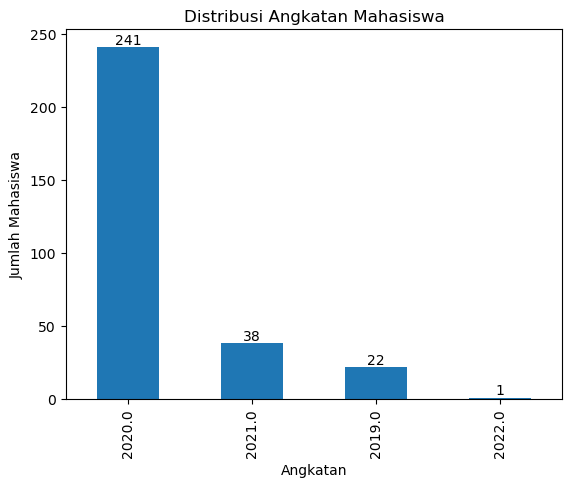

In [18]:
angkatan_count = df1['Angkatan'].value_counts()
ax=angkatan_count.plot(kind='bar')
plt.bar_label(ax.containers[0])
plt.title('Distribusi Angkatan Mahasiswa')
plt.xlabel('Angkatan')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

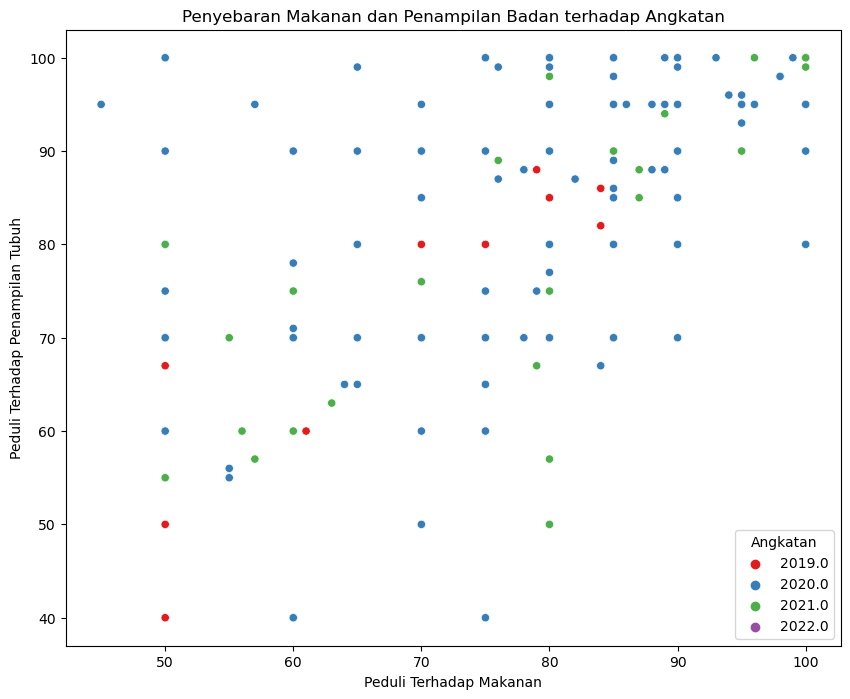

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df1, x='X8', y='X10', hue='Angkatan',palette='Set1', ax=ax)
plt.title("Penyebaran Makanan dan Penampilan Badan terhadap Angkatan")
plt.xlabel('Peduli Terhadap Makanan')
plt.ylabel('Peduli Terhadap Penampilan Tubuh')
plt.show()

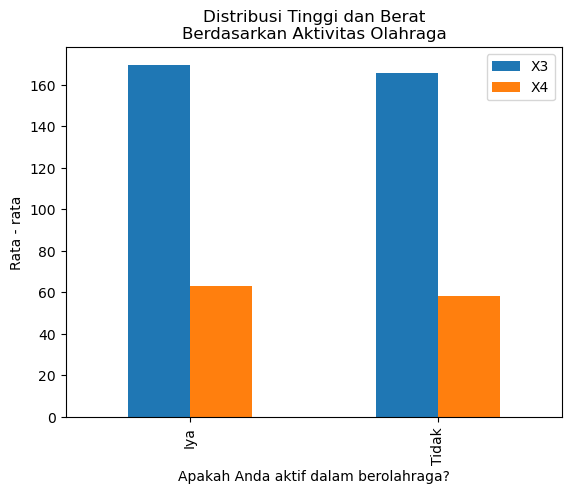

In [20]:
df3 = df1[['Apakah Anda aktif dalam berolahraga?', 'X3', 'X4']]
df3 = df3.groupby(['Apakah Anda aktif dalam berolahraga?']).mean()

df3.plot.bar()
plt.title('Distribusi Tinggi dan Berat\nBerdasarkan Aktivitas Olahraga')
plt.xlabel('Apakah Anda aktif dalam berolahraga?')
plt.ylabel('Rata - rata')
plt.show()

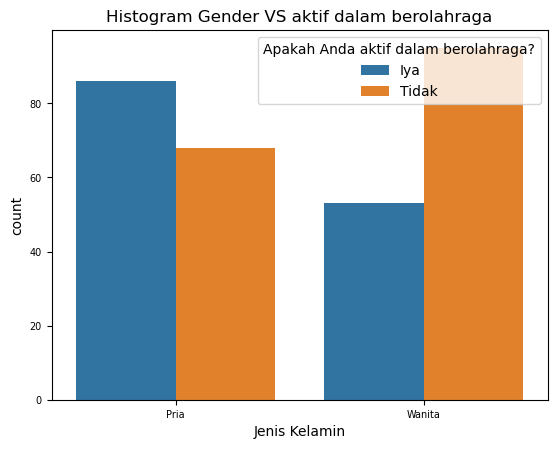

In [21]:
sns.countplot(x = 'Jenis Kelamin',hue = 'Apakah Anda aktif dalam berolahraga?',data = df1)
plt.title('Histogram Gender VS aktif dalam berolahraga')
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);

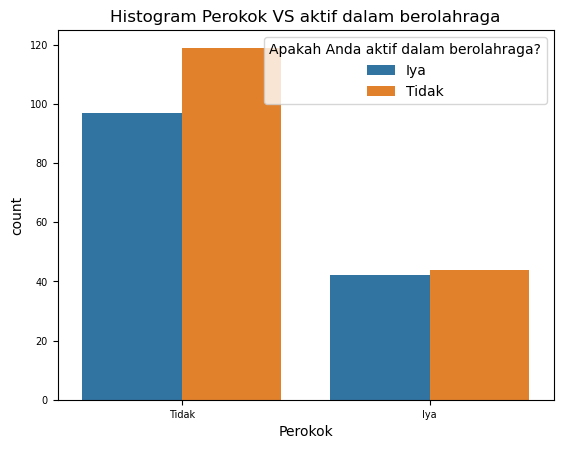

In [22]:
sns.countplot(x = 'X2',hue = 'Apakah Anda aktif dalam berolahraga?',data = df1)
plt.title('Histogram Perokok VS aktif dalam berolahraga')
plt.xticks(fontsize=7);
plt.yticks(fontsize=7);
plt.xlabel('Perokok')
plt.show()

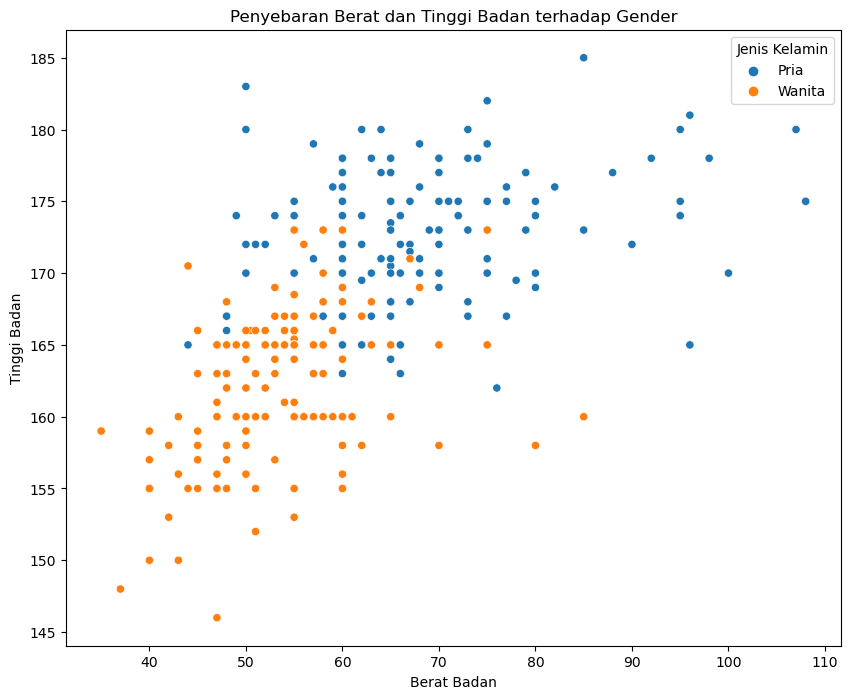

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df1, x='X4', y='X3', hue='Jenis Kelamin', ax=ax)
plt.title("Penyebaran Berat dan Tinggi Badan terhadap Gender")
plt.xlabel('Berat Badan')
plt.ylabel('Tinggi Badan')
plt.show()

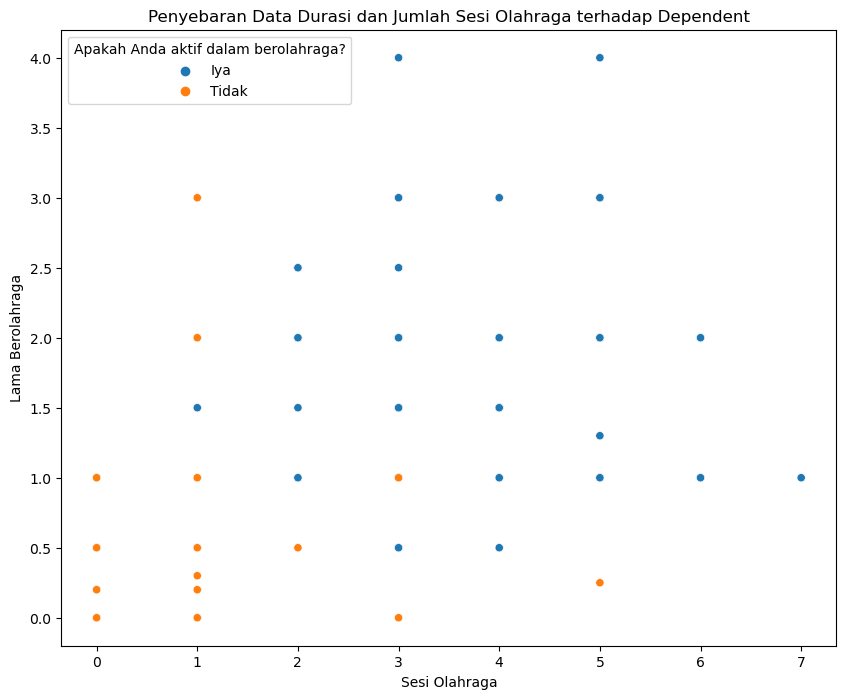

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df1, x='X7', y='X5', hue='Apakah Anda aktif dalam berolahraga?', ax=ax)
plt.title("Penyebaran Data Durasi dan Jumlah Sesi Olahraga terhadap Dependent")
plt.xlabel('Sesi Olahraga')
plt.ylabel('Lama Berolahraga')
plt.show()

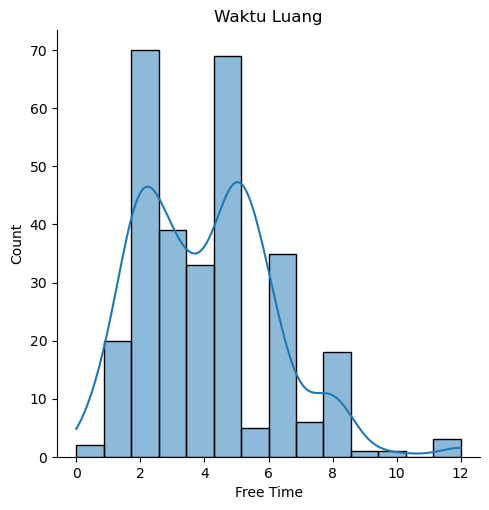

In [25]:
sns.displot(data=df1, x="X11", kde=True)
plt.title("Waktu Luang")
plt.xlabel('Free Time')
plt.show()

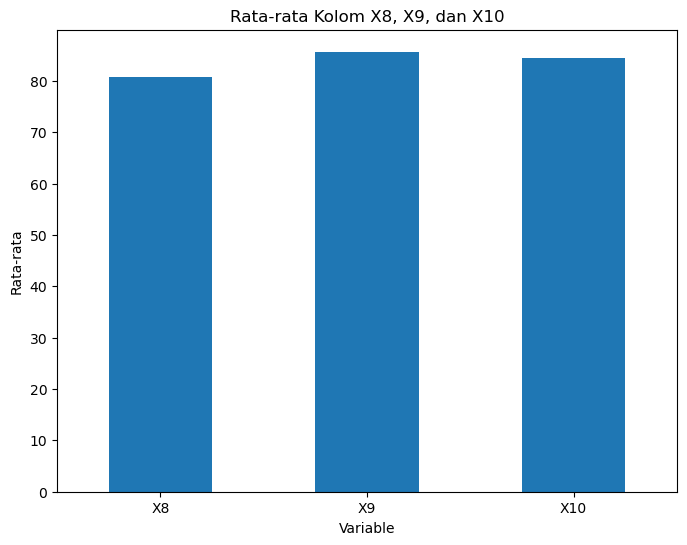

In [26]:
column_means = df1[['X8', 'X9', 'X10']].mean()
plt.figure(figsize=(8, 6))
column_means.plot(kind='bar')
plt.title("Rata-rata Kolom X8, X9, dan X10")
plt.xlabel("Variable")
plt.ylabel("Rata-rata")
plt.xticks(rotation=0)
plt.show()

In [27]:
df1['X1'] = np.where(df1['X1'] == 'Tidak', 0, 1)
df1['X2'] = np.where(df1['X2'] == 'Tidak', 0, 1)
df1['Apakah Anda aktif dalam berolahraga?'] = np.where(df1['Apakah Anda aktif dalam berolahraga?'] == 'Tidak', 0, 1)

In [28]:
df1.groupby('Apakah Anda aktif dalam berolahraga?').count()

,Apakah Kamu Mahasiswa Universitas Prasetiya Mulya?,Jurusan,Angkatan,Domisili,Jenis Kelamin,Usia,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Apakah Anda aktif dalam berolahraga?,,,,,,,,,,,,,,,,,
0,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163
1,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139


In [29]:
df1.groupby('Apakah Anda aktif dalam berolahraga?').mean()

,Angkatan,Usia,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Apakah Anda aktif dalam berolahraga?,,,,,,,,,,,,,
0,2020.024540,20.773006,0.018405,0.269939,165.836810,58.487730,0.689264,6.570552,0.791411,79.398773,83.325153,83.993865,3.909202
1,2020.100719,20.654676,0.187050,0.302158,169.586331,63.021583,1.773381,6.805755,3.258993,82.273381,88.496403,85.244604,4.265468


In [30]:
df1.groupby('Apakah Anda aktif dalam berolahraga?').median()

,Angkatan,Usia,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Apakah Anda aktif dalam berolahraga?,,,,,,,,,,,,,
0,2020.0,21.0,0.0,0.0,165.0,58.0,1.0,6.0,1.0,80.0,85.0,88.0,3.5
1,2020.0,21.0,0.0,0.0,170.0,60.0,2.0,7.0,3.0,85.0,90.0,90.0,5.0


In [31]:
df1.groupby('Apakah Anda aktif dalam berolahraga?').std()

,Angkatan,Usia,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
Apakah Anda aktif dalam berolahraga?,,,,,,,,,,,,,
0,0.508580,0.739541,0.134825,0.445296,6.823172,11.238293,0.719541,1.085649,0.971533,15.838514,13.990245,14.590923,2.257766
1,0.386267,0.848803,0.391362,0.460854,7.363720,13.737428,0.662623,1.053825,1.342387,14.458239,10.754422,13.847954,1.912609


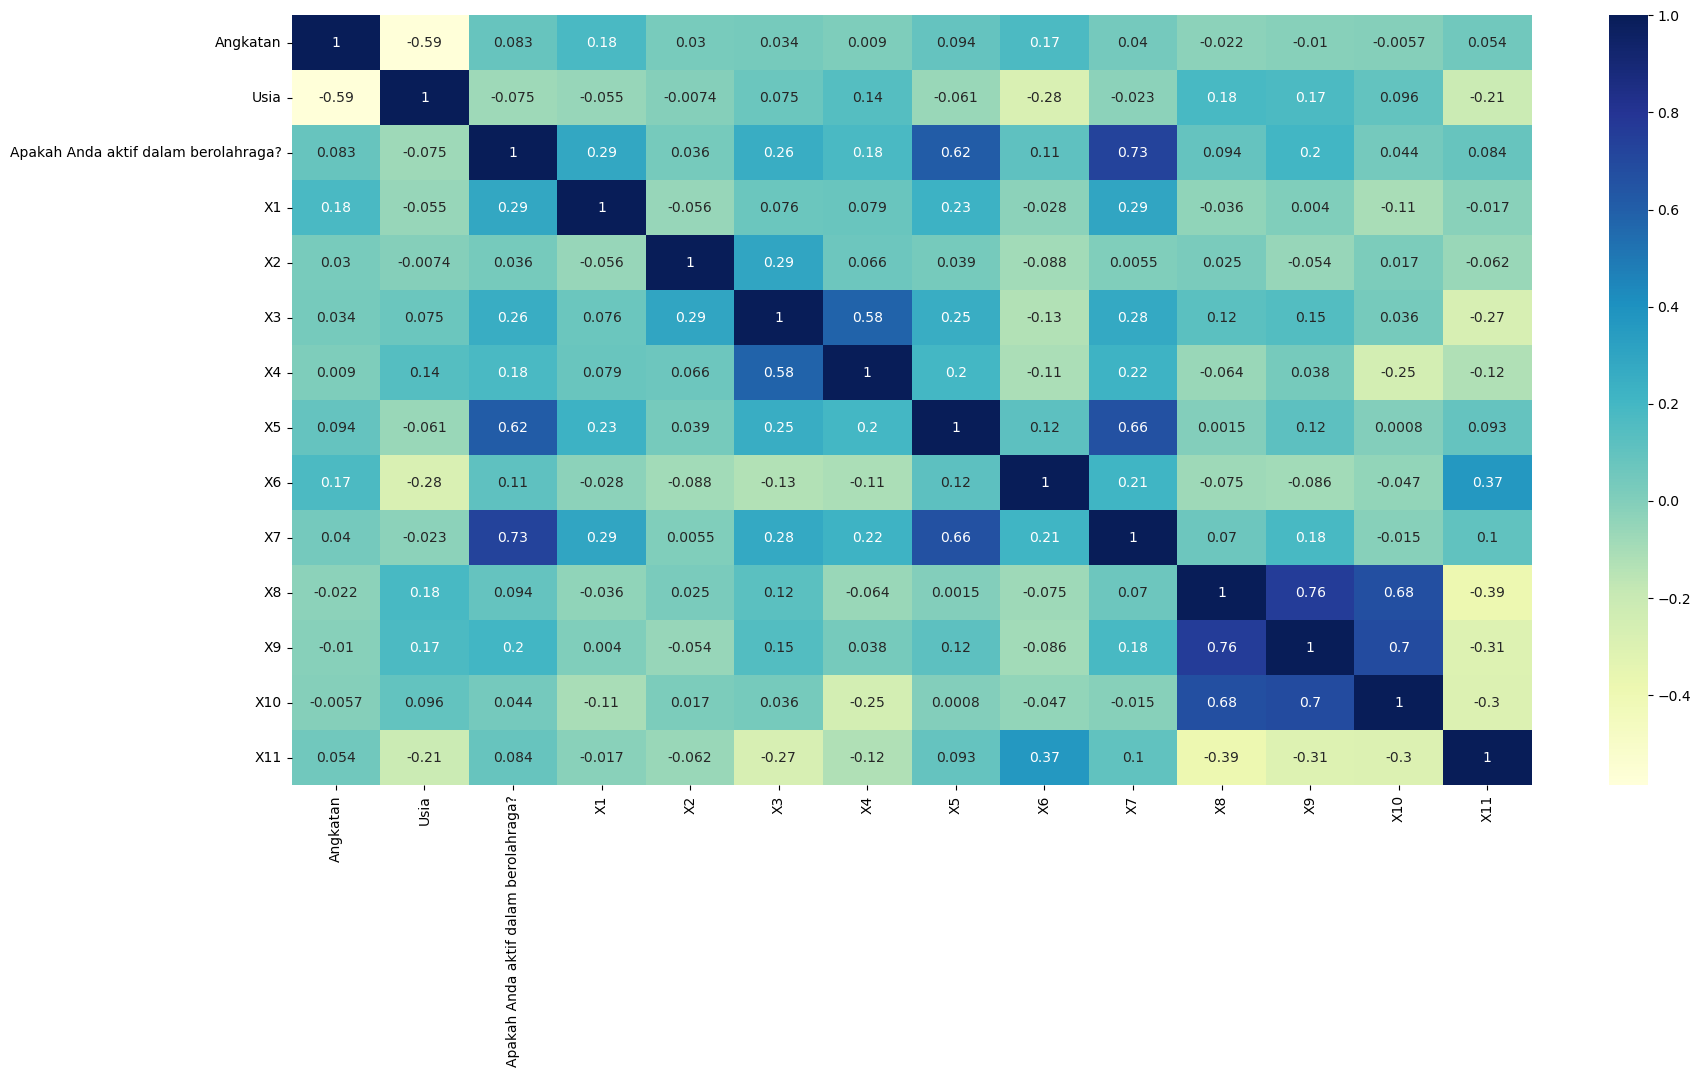

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df1.corr(), cmap='YlGnBu', annot = True)
plt.show()

## <font color=blue> Step 4 : Machine Learning

### <font color=fanta> Splitting Data

In [33]:
df2 = df1[['Apakah Anda aktif dalam berolahraga?','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
df2

,Apakah Anda aktif dalam berolahraga?,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,1,0,0,165.0,96.0,1.00,6.0,2.0,75.0,80.0,70.0,2.0
1,0,0,0,158.0,50.0,1.00,6.0,1.0,75.0,99.0,100.0,5.0
2,0,0,0,168.0,48.0,0.25,8.0,5.0,85.0,85.0,90.0,3.0
3,0,0,0,153.0,42.0,1.00,7.0,2.0,75.0,75.0,70.0,6.0
4,0,0,0,163.0,58.0,0.00,7.0,0.0,80.0,80.0,90.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
305,0,0,0,159.0,50.0,2.00,7.0,1.0,75.0,75.0,75.0,3.0
306,1,0,0,166.0,52.0,2.00,6.0,3.0,65.0,75.0,80.0,4.0
307,0,0,1,175.0,75.0,1.00,5.0,1.0,50.0,75.0,50.0,5.0
308,0,0,1,172.0,60.0,0.00,6.0,0.0,84.0,85.0,86.0,2.0


In [34]:
X = df2[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
y = df2['Apakah Anda aktif dalam berolahraga?']

X_encoded = pd.get_dummies(X)


label_encoder = LabelEncoder()
X_encoded = X.copy()
for column in X_encoded.columns:
    if X_encoded[column].dtype == object:
        X_encoded[column] = label_encoder.fit_transform(X_encoded[column])


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=11)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (211, 11)
Shape of X_test: (91, 11)
Shape of y_train: (211,)
Shape of y_test: (91,)


### <font color=green> KNN, RF, SVM

In [35]:
# Algoritma K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_train_pred = knn.predict(X_train)

# Algoritma Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_train_pred = rf.predict(X_train)

# Algoritma Support Vector Machine (SVM)
svm = SVC(kernel='rbf', random_state = 11, gamma='scale')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_train_pred = svm.predict(X_train)

### <font color=red> Predict new data

In [36]:
new_point = [[0, 0, 170, 78, 1, 6.0, 2.0, 80.0, 70.0, 70.0, 2.0]]
scaled_new_point = sc.transform(new_point)
prediction_knn = knn.predict(scaled_new_point)
prediction_rf = rf.predict(scaled_new_point)
prediction_svm = svm.predict(scaled_new_point)

print(f"The predicted KNN for new data {new_point} is {prediction_knn}")
print(f"The predicted RF for new data {new_point} is {prediction_rf}")
print(f"The predicted SVM for new data {new_point} is {prediction_svm}")

The predicted KNN for new data [[0, 0, 170, 78, 1, 6.0, 2.0, 80.0, 70.0, 70.0, 2.0]] is [1]
The predicted RF for new data [[0, 0, 170, 78, 1, 6.0, 2.0, 80.0, 70.0, 70.0, 2.0]] is [1]
The predicted SVM for new data [[0, 0, 170, 78, 1, 6.0, 2.0, 80.0, 70.0, 70.0, 2.0]] is [0]


### <font color=fanta> KNN Visualization

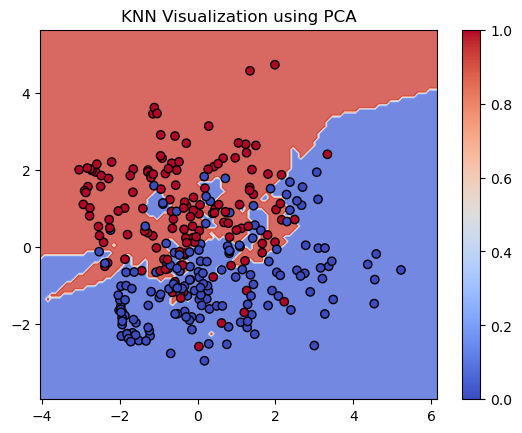

In [37]:
df2.fillna(df2.mean(), inplace=True)

df2['X1'] = pd.to_numeric(df2['X1'], errors='coerce')
df2['X2'] = pd.to_numeric(df2['X2'], errors='coerce')
df2['X3'] = pd.to_numeric(df2['X3'], errors='coerce')
df2['X4'] = pd.to_numeric(df2['X4'], errors='coerce')
df2['X5'] = pd.to_numeric(df2['X5'], errors='coerce')
df2['X6'] = pd.to_numeric(df2['X6'], errors='coerce')
df2['X7'] = pd.to_numeric(df2['X7'], errors='coerce')
df2['X8'] = pd.to_numeric(df2['X8'], errors='coerce')
df2['X9'] = pd.to_numeric(df2['X9'], errors='coerce')
df2['X10'] = pd.to_numeric(df2['X10'], errors='coerce')
df2['X11'] = pd.to_numeric(df2['X11'], errors='coerce')


X = df2[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
y = df2['Apakah Anda aktif dalam berolahraga?']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


knn1 = KNeighborsClassifier(n_neighbors=3, p=2)
knn1.fit(X_pca, y)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


Z = knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('')
plt.ylabel('')
plt.title('KNN Visualization using PCA')
plt.colorbar()
plt.show()

### <font color=fanta> SVM Visualization

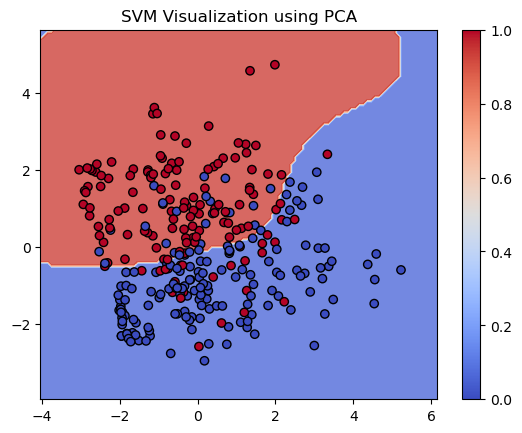

In [38]:
df2.fillna(df2.mean(), inplace=True)


df2['X1'] = pd.to_numeric(df2['X1'], errors='coerce')
df2['X2'] = pd.to_numeric(df2['X2'], errors='coerce')
df2['X3'] = pd.to_numeric(df2['X3'], errors='coerce')
df2['X4'] = pd.to_numeric(df2['X4'], errors='coerce')
df2['X5'] = pd.to_numeric(df2['X5'], errors='coerce')
df2['X6'] = pd.to_numeric(df2['X6'], errors='coerce')
df2['X7'] = pd.to_numeric(df2['X7'], errors='coerce')
df2['X8'] = pd.to_numeric(df2['X8'], errors='coerce')
df2['X9'] = pd.to_numeric(df2['X9'], errors='coerce')
df2['X10'] = pd.to_numeric(df2['X10'], errors='coerce')
df2['X11'] = pd.to_numeric(df2['X11'], errors='coerce')


X = df2[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']]
y = df2['Apakah Anda aktif dalam berolahraga?']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


svm1 = SVC(kernel='rbf')
svm1.fit(X_pca, y)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


Z = svm1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('')
plt.ylabel('')
plt.title('SVM Visualization using PCA')
plt.colorbar()
plt.show()

### <font color=fanta> Random Forest Visualization

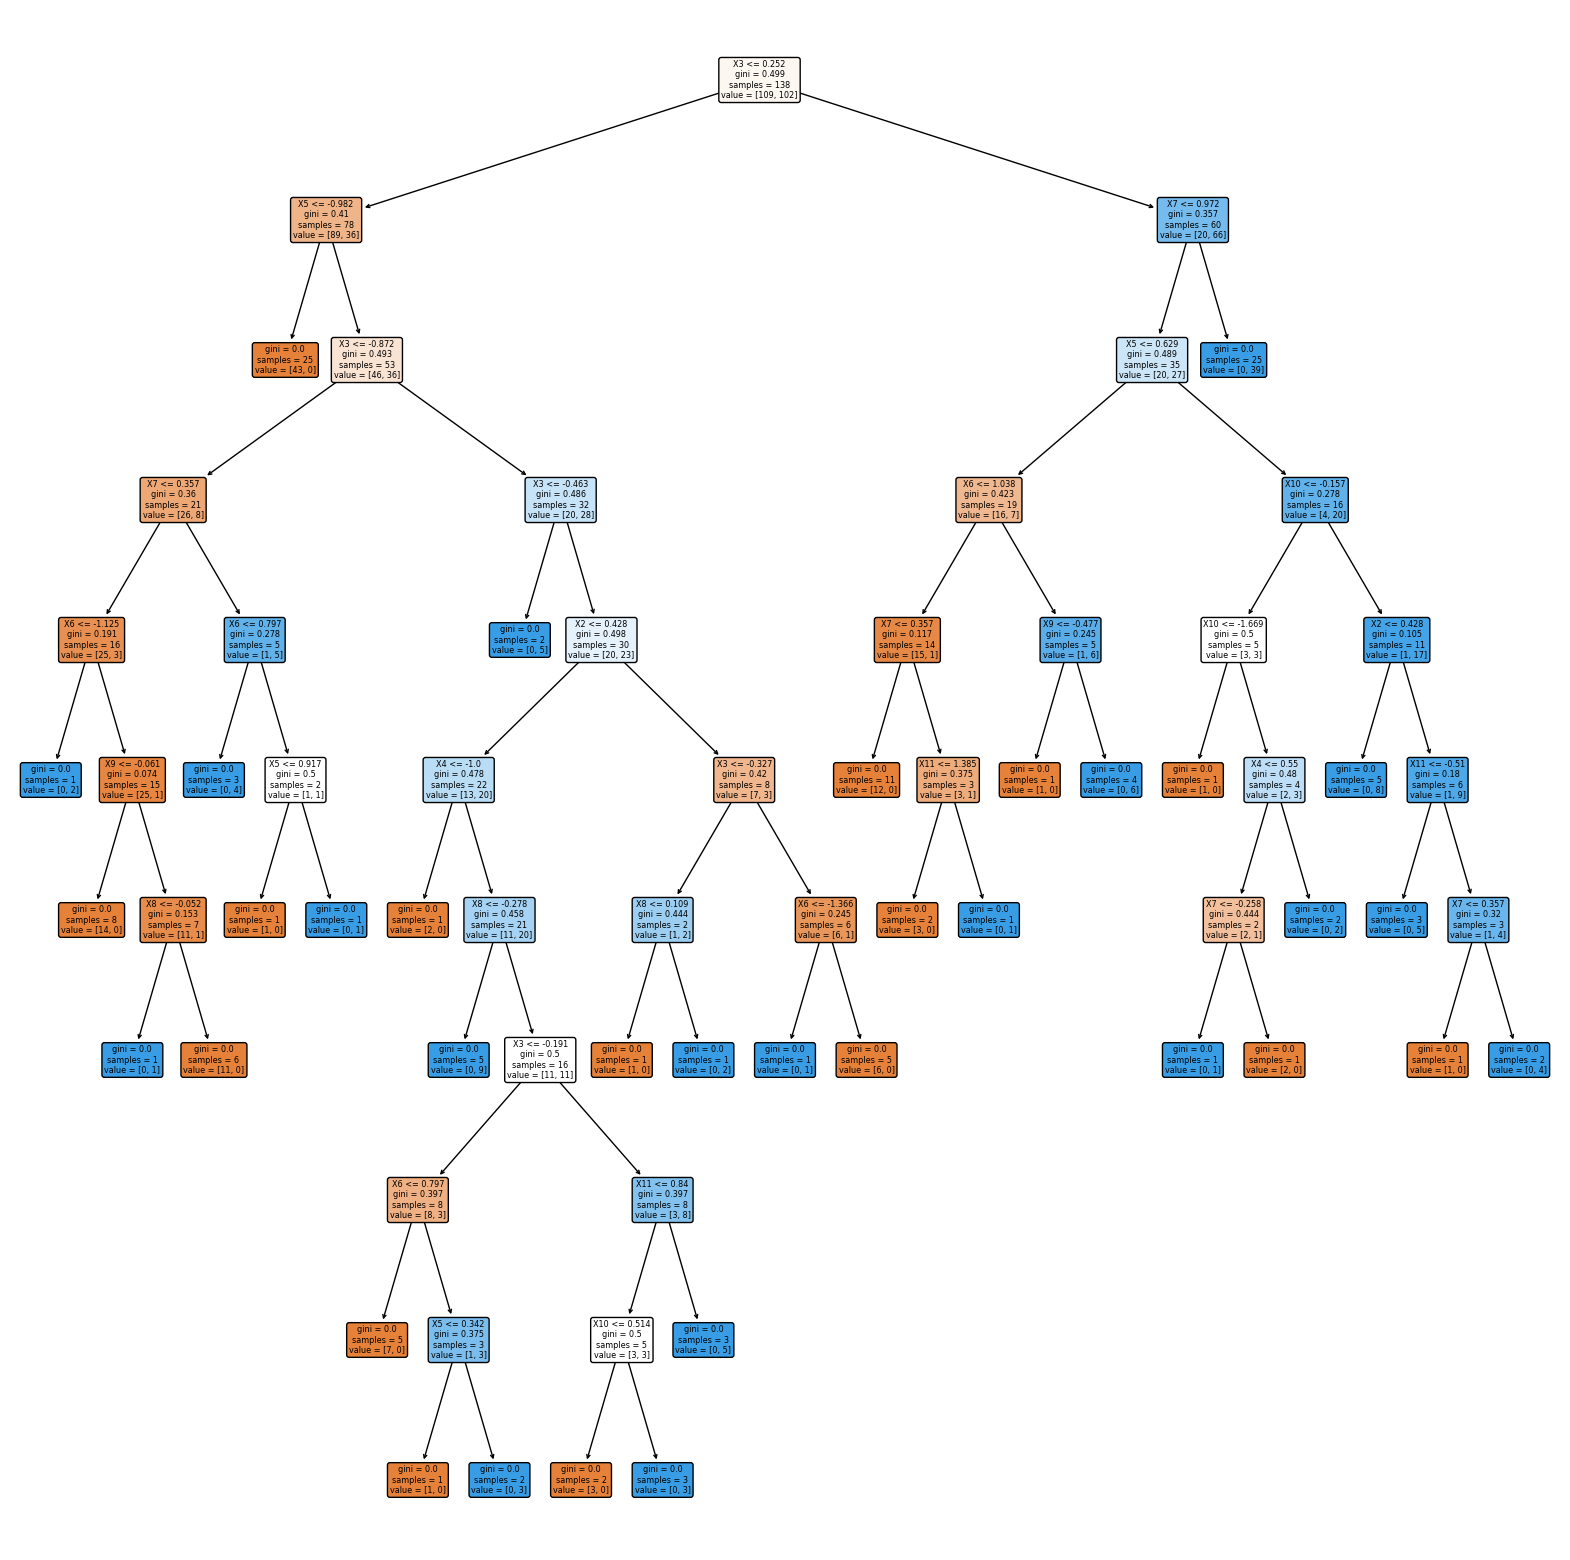

In [39]:
tree = rf.estimators_[0]
plt.figure(figsize=(20, 20))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

## <font color=blue> Step5 : Confusion Matrix and Performances Matrix

### <font color=fanta> Testing Data

In [40]:
knn_cm = confusion_matrix(y_test, knn_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)


knn_df = pd.DataFrame(knn_cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
rf_df = pd.DataFrame(rf_cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
svm_df = pd.DataFrame(svm_cm, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])


print("Confusion Matrix KNN:")
print(knn_df)

print("\nConfusion Matrix Random Forest:")
print(rf_df)

print("\nConfusion Matrix SVM:")
print(svm_df)


Confusion Matrix KNN:
            Predicted No  Predicted Yes
Actual No             41             10
Actual Yes             9             31

Confusion Matrix Random Forest:
            Predicted No  Predicted Yes
Actual No             41             10
Actual Yes             6             34

Confusion Matrix SVM:
            Predicted No  Predicted Yes
Actual No             44              7
Actual Yes             8             32


In [41]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, pos_label=1)
knn_recall = recall_score(y_test, knn_predictions, pos_label=1)
knn_f1 = f1_score(y_test, knn_predictions, pos_label=1)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label=1)
rf_recall = recall_score(y_test, rf_predictions, pos_label=1)
rf_f1 = f1_score(y_test, rf_predictions, pos_label=1)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, pos_label=1)
svm_recall = recall_score(y_test, svm_predictions, pos_label=1)
svm_f1 = f1_score(y_test, svm_predictions, pos_label=1)

data1 = {
    'Model': ['KNN', 'Random Forest', 'SVM'],
    'Accuracy': [knn_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [knn_precision, rf_precision, svm_precision],
    'Recall': [knn_recall, rf_recall, svm_recall],
    'F1-Score': [knn_f1, rf_f1, svm_f1]
}

perfom = pd.DataFrame(data1)
perfom

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.791209,0.756098,0.775,0.765432
1,Random Forest,0.824176,0.772727,0.850,0.809524
2,SVM,0.835165,0.820513,0.800,0.810127


**`Penjelasan:`**

Berdasarkan data di atas, pada data testing, SVM merupakan model terbaik karena memiliki Accuracy, Precision, Recall (Sensitivity), dan F1-Score tertinggi di antara model lainnya.

### <font color=fanta> Data Train

In [42]:
knn_cm1 = confusion_matrix(y_train, knn_train_pred)
rf_cm1 = confusion_matrix(y_train, rf_train_pred)
svm_cm1 = confusion_matrix(y_train, svm_train_pred)


knn_df1 = pd.DataFrame(knn_cm1, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
rf_df1 = pd.DataFrame(rf_cm1, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])
svm_df1 = pd.DataFrame(svm_cm1, index=['Actual No', 'Actual Yes'], columns=['Predicted No', 'Predicted Yes'])


print("Confusion Matrix KNN:")
print(knn_df1)

print("\nConfusion Matrix Random Forest:")
print(rf_df1)

print("\nConfusion Matrix SVM:")
print(svm_df1)

Confusion Matrix KNN:
            Predicted No  Predicted Yes
Actual No            104              8
Actual Yes            10             89

Confusion Matrix Random Forest:
            Predicted No  Predicted Yes
Actual No            112              0
Actual Yes             0             99

Confusion Matrix SVM:
            Predicted No  Predicted Yes
Actual No            106              6
Actual Yes             9             90


In [43]:
knn_accuracyy = accuracy_score(y_train, knn_train_pred)
knn_precisionn = precision_score(y_train, knn_train_pred, pos_label=1)
knn_recalll = recall_score(y_train, knn_train_pred, pos_label=1)
knn_f11 = f1_score(y_train, knn_train_pred, pos_label=1)

rf_accuracyy = accuracy_score(y_train, rf_train_pred)
rf_precisionn = precision_score(y_train, rf_train_pred, pos_label=1)
rf_recalll = recall_score(y_train, rf_train_pred, pos_label=1)
rf_f11 = f1_score(y_train, rf_train_pred, pos_label=1)

svm_accuracyy = accuracy_score(y_train, svm_train_pred)
svm_precisionn = precision_score(y_train, svm_train_pred, pos_label=1)
svm_recalll = recall_score(y_train, svm_train_pred, pos_label=1)
svm_f11 = f1_score(y_train, svm_train_pred, pos_label=1)

data1 = {
    'Model': ['KNN', 'Random Forest', 'SVM'],
    'Accuracy': [knn_accuracyy, rf_accuracyy, svm_accuracyy],
    'Precision': [knn_precisionn, rf_precisionn, svm_precisionn],
    'Recall': [knn_recalll, rf_recalll, svm_recalll],
    'F1-Score': [knn_f11, rf_f11, svm_f11]
}

perfom = pd.DataFrame(data1)
perfom

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.914692,0.917526,0.898990,0.908163
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,SVM,0.928910,0.937500,0.909091,0.923077


**`Penjelasan:`**

Berdasarkan tabel di atas, pada data training, Random Forest merupakan model terbaik karena memiliki tingkat Accuracy, Precision, Recall (Sensitivity), dan F1-Score tertinggi di antara model lainnya.

### <font color=orange> Training Data VS Testing Data

### <font color=fanta> KNN

In [44]:
metrics=["Accuracy","Precision","Recall","F1-Score"]
performance_train=[knn_accuracyy,knn_precisionn,knn_recalll,knn_f11]
performance_test=[knn_accuracy,knn_precision,knn_recall,knn_f1]
performance1=pd.DataFrame({"KNN Model":metrics,"Training Data":performance_train,"Testing Data":performance_test})
performance1.style.format({"Training Data":"{:,.2%}","Testing Data":"{:.2%}"})

,KNN Model,Training Data,Testing Data
0,Accuracy,91.47%,79.12%
1,Precision,91.75%,75.61%
2,Recall,89.90%,77.50%
3,F1-Score,90.82%,76.54%


**`Penjelasan:`**

Pada model ``KNN``, untuk keempat metrik Accuracy, Precision, Recall (Sensitivity), dan F1-Score memberikan hasil bahwa modelnya adalah ``Overfit``.

### <font color=fanta> Random Forest

In [45]:
metrics=["Accuracy","Precision","Recall","F1-Score"]
performance_train=[rf_accuracyy,rf_precisionn,rf_recalll,rf_f11]
performance_test=[rf_accuracy,rf_precision,rf_recall,rf_f1]
performance1=pd.DataFrame({"RF Model":metrics,"Training Data":performance_train,"Testing Data":performance_test})
performance1.style.format({"Training Data":"{:,.2%}","Testing Data":"{:.2%}"})

,RF Model,Training Data,Testing Data
0,Accuracy,100.00%,82.42%
1,Precision,100.00%,77.27%
2,Recall,100.00%,85.00%
3,F1-Score,100.00%,80.95%


**`Penjelasan:`**

Pada model ``Random Forest``, untuk keempat metrik Accuracy, Precision, Recall (Sensitivity), dan F1-Score memberikan hasil bahwa modelnya ``Overfit``.

### <font color=fanta> SVM

In [46]:
metrics=["Accuracy","Precision","Recall","F1-Score"]
performance_train=[svm_accuracyy,svm_precisionn,svm_recalll,svm_f11]
performance_test=[svm_accuracy,svm_precision,svm_recall,svm_f1]
performance1=pd.DataFrame({"SVM Model":metrics,"Training Data":performance_train,"Testing Data":performance_test})
performance1.style.format({"Training Data":"{:,.2%}","Testing Data":"{:.2%}"})

,SVM Model,Training Data,Testing Data
0,Accuracy,92.89%,83.52%
1,Precision,93.75%,82.05%
2,Recall,90.91%,80.00%
3,F1-Score,92.31%,81.01%


**`Penjelasan:`**

Pada model `SVM`, untuk keempat metrik Accuracy, Precision, Recall (Sensitivity), dan F1-Score memberikan hasil bahwa modelnya adalah `Overfit`.

## <font color=blue> Step 6 : Metode Evaluasi

### <font color=fanta> K-Fold Validation

In [47]:
k_fold = 10

knn_scores = cross_val_score(knn, X, y, cv=k_fold)
svm_scores = cross_val_score(svm, X, y, cv=k_fold)
rf_scores = cross_val_score(rf, X, y, cv=k_fold)


print("KNN Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))

KNN Accuracy: 0.66 (+/- 0.12)
SVM Accuracy: 0.60 (+/- 0.11)
Random Forest Accuracy: 0.87 (+/- 0.12)


**`Penjelasan:`**

Berdasarkan `Cross Validation`, `SVM` memiliki model dengan akurasi yang lebih buruk dibandingkan model lainnya sedangkan `Random Forest` memiliki akurasi terbaik.

### <font color=fanta> RMSE, MSE dan MAE

In [48]:
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

svm_rmse = np.sqrt(mean_squared_error(y_test, svm_predictions))
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)

data = {
    'Model': ['KNN', 'Random Forest', 'SVM'],
    'RMSE': [knn_rmse, rf_rmse, svm_rmse],
    'MSE': [knn_mse, rf_mse, svm_mse],
    'MAE': [knn_mae, rf_mae, svm_mae]
}

eval = pd.DataFrame(data)
eval


,Model,RMSE,MSE,MAE
0,KNN,0.456937,0.208791,0.208791
1,Random Forest,0.419314,0.175824,0.175824
2,SVM,0.405999,0.164835,0.164835


**`Penjelasan:`**

Berdasarkan tabel di atas, `SVM` memiliki model terbaik dikarenakan memiliki RMSE, MSE, dan MAE yang paling kecil, sedangkan ``KNN`` memiliki model dengan RMSE, MSE, dan MAE yang besar atau berarti kurang baik dibandingkan dengan kedua model lainnya.

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your features (X) and target variable (y) ready

# Create a KFold object
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

# Perform k-fold cross-validation
scores = cross_val_score(knn, X, y, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold KNN:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy KNN:", mean_accuracy)

Accuracy scores for each fold KNN: [0.70967742 0.51612903 0.8        0.63333333 0.66666667 0.56666667
 0.66666667 0.6        0.73333333 0.8       ]
Mean accuracy KNN: 0.6692473118279569


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your features (X) and target variable (y) ready

# Create a KFold object
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

# Perform k-fold cross-validation
scores = cross_val_score(rf, X, y, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold RF:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy RF:", mean_accuracy)

Accuracy scores for each fold RF: [0.87096774 0.74193548 0.83333333 0.9        0.93333333 0.86666667
 0.86666667 0.8        0.9        0.96666667]
Mean accuracy RF: 0.8679569892473118


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Assuming you have your features (X) and target variable (y) ready

# Create a KFold object
kfold = KFold(n_splits=10, shuffle=True, random_state=11)

# Perform k-fold cross-validation
scores = cross_val_score(svm, X, y, cv=kfold)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold svm:", scores)

# Calculate the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy svm:", mean_accuracy)

Accuracy scores for each fold svm: [0.58064516 0.38709677 0.73333333 0.66666667 0.46666667 0.53333333
 0.76666667 0.36666667 0.73333333 0.56666667]
Mean accuracy svm: 0.5801075268817204
